# DATA 1030 Final Project — Alejandro Contreras

**Ensure Data1030 Environment is Running**

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.10"):
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.22.4", 'matplotlib': "3.5.2",'sklearn': "1.1.1", 
                'pandas': "1.4.2",'xgboost': "1.5.1", 'shap': "0.40.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.10.5

[ OK ] numpy version 1.22.4 is installed.
[ OK ] matplotlib version 3.5.2 is installed.
[ OK ] sklearn version 1.1.1 is installed.
[ OK ] pandas version 1.4.2 is installed.
[ OK ] xgboost version 1.5.1 is installed.


/Users/alejandrocontreras/opt/anaconda3/envs/data1030/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[ OK ] shap version 0.40.0 is installed.


**Libraries/Packages that will be used**

In [2]:
#Import Packages
import pandas as pd #For Data Manipulation
import numpy as np #For mathematical Operations
import matplotlib #For Creating Figures
from matplotlib import pylab as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression, mutual_info_regression
import os #For Working with File Locations
#import urllib #Import data from URLs
#import requests #Import data from URLs that download as Zip files
#import zipfile #Import data from URLs that download as Zip files
#import io #Import data from URLs that download as Zip files

Verify the working directory

In [3]:
#Get current working directory
print(os.getcwd())

/Users/alejandrocontreras/Desktop/DataSci/DATA1030-Fall2022/Final Project


**Download the 2020 California Health Interview Survey**

Note: the data is only available to researchers who contain an account with UCLA's Center for Health Policy Research. Accounts are free, although they can take some time to be approved. https://healthpolicy.ucla.edu/chis/Pages/default.aspx

The data dictionary can be found here: https://healthpolicy.ucla.edu/chis/data/public-use-data-file/Documents/CHIS%202020%20Data%20Dictionary%20-%20Adult%20May%202022.pdf

The questionnaire can be found here: https://healthpolicy.ucla.edu/chis/data/public-use-data-file/Documents/2020/CHIS%202020%20CAWI%20Adult%20Questionnaire.pdf

In [4]:
data = pd.read_stata('ADULT_2020.dta')

In [5]:
print("The original dataset contains", data.shape[0], "rows and", data.shape[1], "columns.")

The original dataset contains 21949 rows and 604 columns.


Given that we do not need all of the columns, we will only get the data from the following sections:

- Section A — Demographics part I

- Section G — Demographics part II

- Section K — Employment, Income, Poverty Status, Food Security

- Section M — Housing and Social Cohesion

- Section P —  Voter Engagement

**Section A**
SRAGE_P1
SRSEX
LATIN2TP
OMBSRR_P1
RACECN_P1
RACEDF_P1
RACEHP2_P1
AA5C
AA5G
MARIT
MARIT_45
MARIT2
INTV_MODE2

**Section G**
AH33NEW
AH34NEW
AH35NEW
LNGHM_P1
AH37
SPK_ENG
CITIZEN2
YRUS_P1
PCTLF_P
AH44
AH43A
AH44A
AH44B
ACHLDC_P1
AHEDC_P1
AG52
AG53
AG8
AG9_P1
AG10
AG11
WRKST_P1
AG22
AG31
SERVED
SREDUC
FAMTYP_P
FAMSIZE2_P1
FAMT4

**Section K**
AK1
AK2_P1
AK3_P1V2
AK4
INDMAIN2
IND_FLAG3
OCCMAIN2
OCC_FLAG3
AK7_P1V2
AKWKLNG
AK8
AK10_P
AK20_P1
AK22_P1
AK10A_P
AK32V2
AK33V2_P1
AM1
AM2
AM3
AM3A
AM4
AM5
FSLEV
FSLEVCB
POVGWD_P1
POVLL2_P1V2
POVLL
ELGMAGI3
ELGMAGI4
ELGMAGI5
ELDER_IDX

**Section M**
AM37
AJ178
AK23
AM39
AM44
AM45
AM48
AK25
AM19
AM20
AM21
AK28

**Section P**
AP73V2
AP74V2
AP75V2
VOTE_ENG2
AP80
VOTE_RSNNO

In [6]:
Demographics_I = ["srage_p1", "srsex", "latin2tp", "ombsrr_p1", "racecn_p1", "racedf_p1", 
                  "racehp2_p1", "aa5c", "aa5g", "marit", "marit_45", "marit2", "intv_mode2"]

Demographics_II = ["ah33new", "ah34new", "ah35new", "lnghm_p1", "ah37", "spk_eng", "citizen2", "yrus_p1", 
                   "pctlf_p", "ah44", "ah43a", "ah44a", "ah44b", "achldc_p1", "ahedc_p1", "ag52", 
                   "ag53", "ag8", "ag9_p1", "ag10", "ag11", "wrkst_p1", "ag22", "ag31", "served", "sreduc", 
                   "famtyp_p", "famsize2_p1", "famt4"]

Emp_Inc_Pov_Food = ["ak1", "ak2_p1", "ak3_p1v2", "ak4", "indmain2", "ind_flag3", "occmain2", "occ_flag3",
                    "ak7_p1v2", "akwklng", "ak8", "ak10_p", "ak20_p1", "ak22_p1", "ak10a_p", "ak32v2", 
                    "ak33v2_p1", "am1", "am2", "am3", "am3a", "am4", "am5", "fslev", "fslevcb", "povgwd_p1",
                    "povll2_p1v2", "povll", "elgmagi3", "elgmagi4", "elgmagi5", "elder_idx"]

Housing_Civics = ["am37", "aj178", "ak23", "am39", "am44", "am45", "am48", "ak25", "am19", "am20", "am21", "ak28", "ur_bg6"]

Voting = ["ap73v2", "ap74v2", "ap75v2", "vote_eng2", "ap80", "vote_rsnno"]

Housing_Insecurity = ["cv7_6"]

In [7]:
# iterating the columns
#for col in data.columns:
#    print(col)

In [8]:
df = data[Demographics_I + Demographics_II + Emp_Inc_Pov_Food + Housing_Civics + Voting + Housing_Insecurity]

In [9]:
Economics = ["ak7_p1v2", # LENGTH OF TIME WORKING AT MAIN JOB
             "ak3_p1v2", # OF USUAL HRS WORKED PER WEEK
            ]

Demographics = ["srsex", #Sex
                "srage_p1", #Age
                "sreduc" #Education
               ]

Family_History = ["citizen2", # CITIZENSHIP STATUS
                  "famsize2_p1" #FAMILY SIZE: INCL. ALL SUPT’D BY HH INCOME
                 ]

Military = ["ag22"] #EVER SERVE IN U.S. ARMED FORCES

Housing = ["ur_bg6", #Urban/Rural
           "ak25" #OWN OR RENT HOME
          ]

Civics = ["am39", #VOLUNTEER IN ORG DEALING W/COMM PROB PAST YR
         ]

Politics = ["ap73v2", #FREQUENCY OF VOTING IN PRESIDENTIAL ELECTIONS
           ]


In [10]:
df = df[Economics + 
        Demographics + 
        Family_History + 
        Military + 
        Housing + 
        Civics + 
        Politics]

In [11]:
#Are the features are continuous, ordinal, or categorical.

#for i in X.columns:
#    #print(i)
#    #print(X[i].describe())
#    #print(X[i].value_counts().sort_index())
#    temp = np.sort(X[i].unique()).tolist()
#    print(temp)
#    print()  

In [12]:
#Are the features are continuous, ordinal, or categorical.

#for i in X.columns:
#    print(i)
#    #print(X[i].describe())
#    print(X[i].value_counts().sort_index())
#    #temp = np.sort(X[i].unique()).tolist()
#    #print(temp)
#    print()  

**Subset Data**

In [13]:
# read the data
import pandas as pd
import numpy  as np
from sklearn.model_selection import train_test_split

# the target variable
y = df['am39']
X = df.loc[:, df.columns != 'am39']

#df.drop(columns=['vote_eng2'],inplace=True)
# the unprocessed feature matrix
#X = df.values
#print(X.shape)
# the feature names
ftrs = X.columns

**Visualize the Target Variable**

**Note: In this instance, the target variable is categorical**

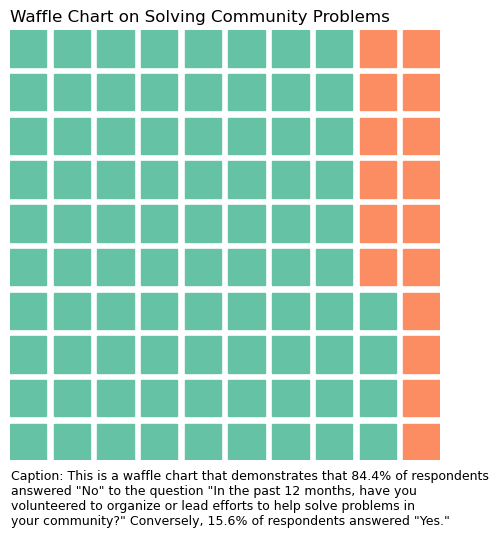

In [14]:
#Visualize the target variable.

#!pip install pywaffle
from pywaffle import Waffle

temp = y.value_counts() / len(y)*100

temp = temp.rename_axis(y.name).reset_index(name='Percent')

#print(temp)

caption = 'Caption: \
This is a waffle chart that demonstrates that 84.4% of respondents \n\
answered "No" to the question "In the past 12 months, have you \n\
volunteered to organize or lead efforts to help solve problems in \n\
your community?" Conversely, 15.6% of respondents answered "Yes."'

fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values= temp["Percent"], 
    title={'label': 'Waffle Chart on Solving Community Problems', 'loc': 'left'},
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.1), 'ncol': len(temp), 'framealpha': 0}
)
plt.figtext(0.025, -0.1, caption, wrap=True, horizontalalignment='left', fontsize=9) #Add caption
plt.show()

Based on the above figure, the baseline accuracy of the model will be 84.4%. This is because the model could assign "No" to all everyone and be correct 84.4% of the time.

**Use the following code if dependent variable is continuous**

In [15]:
#y.plot.hist(bins = y.nunique())
#plt.xlabel(y.name)
#plt.ylabel('Count')
#plt.title('This will be the title')
#plt.show()

# Relationship between Dependent and Independent Variables

## <center> Overview </center>


| *Visualization types*        	|    column continuous    	| column categorical 	|
|---------------------	|:----------------------:	|:-----------------:	|
| __column continuous__    	| scatter plot, heatmap 	| category-specific histograms, box plot, violin plot |
| __column categorical__   	| category-specific histograms, box plot, violin plot |  stacked bar plot  	|


# Continuous Independent Variables

**Visualize Continuous Independent Variables**

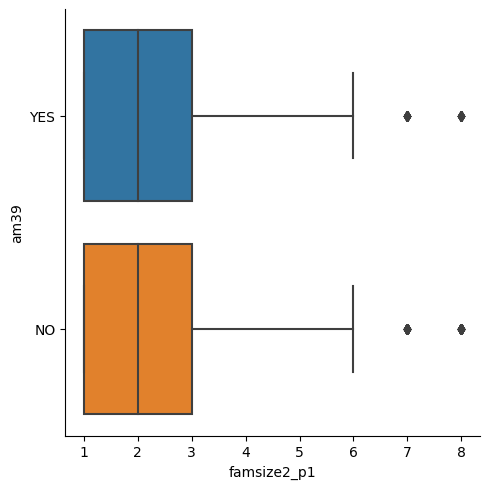

In [16]:
import seaborn as sns

num_ftrs = ['famsize2_p1']

for var in num_ftrs:
    #Copy dataframe
    temp = df 
    #Turn variable to numeric - coerce cause non-numbers to be NaN
    temp[var] = pd.to_numeric(temp[var], errors='coerce') 
    #Remove rows with NaN values
    temp = temp[temp[var].notnull()]
    #Plot the data
    sns.catplot(data=temp, x=var, y=y.name, kind="box")

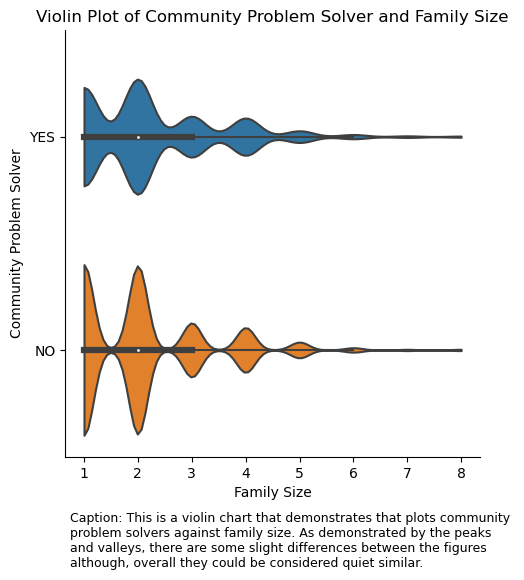

In [17]:
import seaborn as sns

num_ftrs = ['famsize2_p1']

caption = 'Caption: \
This is a violin chart that demonstrates that plots community \n\
problem solvers against family size. As demonstrated by the peaks \n\
and valleys, there are some slight differences between the figures \n\
although, overall they could be considered quiet similar.'

for var in num_ftrs:
    #Copy dataframe
    temp = df 
    #Turn variable to numeric - coerce cause non-numbers to be NaN
    temp[var] = pd.to_numeric(temp[var], errors='coerce') 
    #Remove rows with NaN values
    temp = temp[temp[var].notnull()]
    #Plot the data
    ax = sns.catplot(data=temp, x=var, y=y.name, kind="violin", cut=0, inner='box', figsize=(10,6))
    ax.set(xlabel='Family Size', ylabel='Community Problem Solver', title = 'Violin Plot of Community Problem Solver and Family Size')
    plt.figtext(0.15, -0.1, caption, wrap=True, horizontalalignment='left', fontsize=9) #Add caption
    plt.show()

# Categorical Independent Data

**Visualization of Categorical Independent Variables**

In [18]:
#Keep for later on

#for var in cat_ftrs:
#    temp = pd.crosstab(y, df[var], normalize='index')
#    print("Crosstab of", y.name, "and", df[var].name, "with normalization = index", "\n", temp)
#    print()
#    temp.plot(kind='bar', stacked=True)
#    plt.ylabel('Fraction of People in Group')
#    plt.title('Stacked Bar Plot of am39 and %s' %var)
#    plt.legend(loc=4)
#    plt.show()

<Figure size 500x300 with 0 Axes>

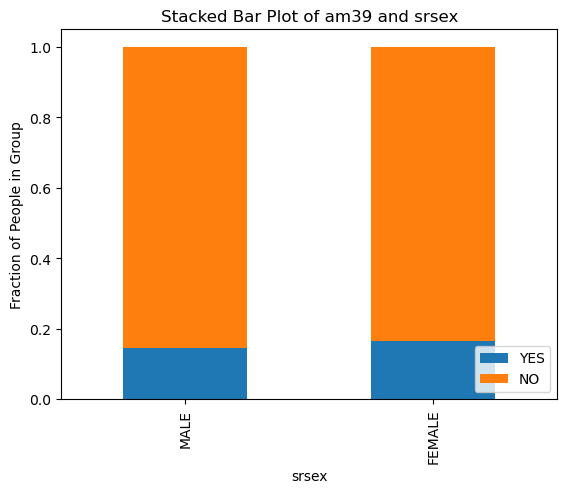

<Figure size 500x300 with 0 Axes>

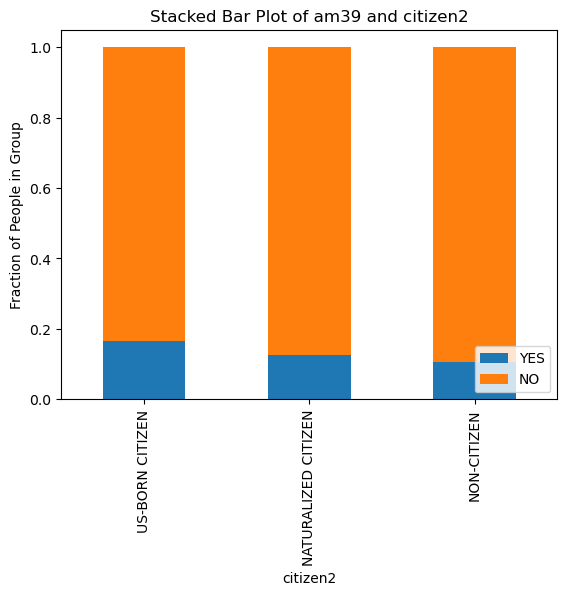

<Figure size 500x300 with 0 Axes>

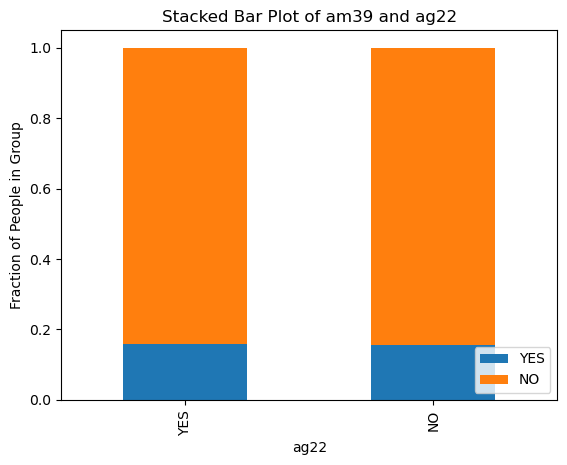

<Figure size 500x300 with 0 Axes>

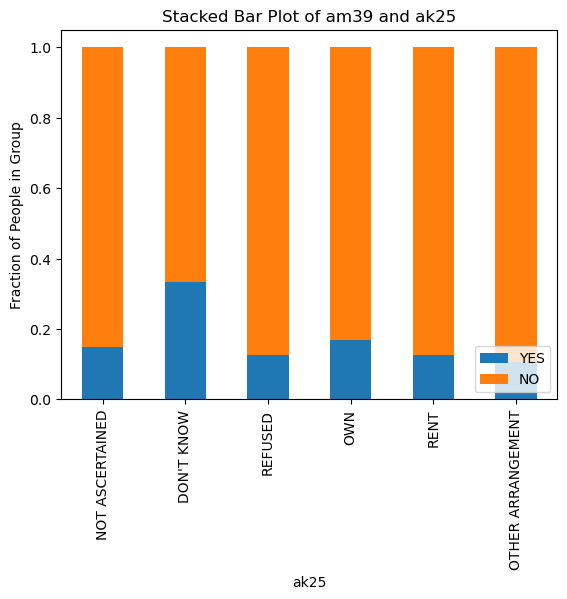

In [19]:
cat_ftrs = ['srsex','citizen2','ag22','ak25']

for var in cat_ftrs:
    count_matrix = df.groupby([var, y.name]).size().unstack()
    #print(count_matrix)
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    #print(count_matrix_norm)
    plt.figure(figsize=(5,3))
    count_matrix_norm.plot(kind='bar', stacked=True)
    plt.ylabel('Fraction of People in Group')
    plt.title('Stacked Bar Plot of am39 and %s' %var)
    plt.legend(loc=4)
    plt.show()

**Crosstabs of Categorical Independent Variables**

Normalization setting:

- If passed `False`, will not normalize (value counts).
- If passed 'all' or `True`, will normalize over all values.
- If passed 'index' will normalize over each row.
- If passed 'columns' will normalize over each column.
- If margins is `True`, will also normalize margin values.  

In [20]:
#!pip install tabulate

In [21]:
#from tabulate import tabulate
# Crosstabs of all categorical features

cat_ftrs = ['srsex','citizen2','ag22','ak25']
norms = [False, 'all', 'index', 'columns']
#norms = [False, 'all', 'index', 'columns', True]

#Loop
for var in cat_ftrs:
    for norm in norms:
        print("Crosstab of", y.name, "and", df[var].name, "with normalization =", norm, "\n")
        print(pd.crosstab(y, df[var], normalize=norm))
        print()
        
#Change Output look
#for var in ord_ftrs:
#    for norm in norms:
#        print("Crosstab of", y.name, "and", df[var].name, "with normalization =", norm, "\n")
#        temp = pd.crosstab(y, df[var], normalize=norm)
#        print(tabulate(temp, headers='keys', tablefmt='psql'))  
#        print()      

Crosstab of am39 and srsex with normalization = False 

srsex  MALE  FEMALE
am39               
YES    1392    2026
NO     8183   10348

Crosstab of am39 and srsex with normalization = all 

srsex      MALE    FEMALE
am39                     
YES    0.063420  0.092305
NO     0.372819  0.471457

Crosstab of am39 and srsex with normalization = index 

srsex      MALE    FEMALE
am39                     
YES    0.407256  0.592744
NO     0.441584  0.558416

Crosstab of am39 and srsex with normalization = columns 

srsex      MALE   FEMALE
am39                    
YES    0.145379  0.16373
NO     0.854621  0.83627

Crosstab of am39 and citizen2 with normalization = False 

citizen2  US-BORN CITIZEN  NATURALIZED CITIZEN  NON-CITIZEN
am39                                                       
YES                  2863                  429          126
NO                  14493                 2985         1053

Crosstab of am39 and citizen2 with normalization = all 

citizen2  US-BORN CITIZEN  

# Ordinal Independent Data

**Visualization of Ordinal Independent Variable**

<Figure size 500x300 with 0 Axes>

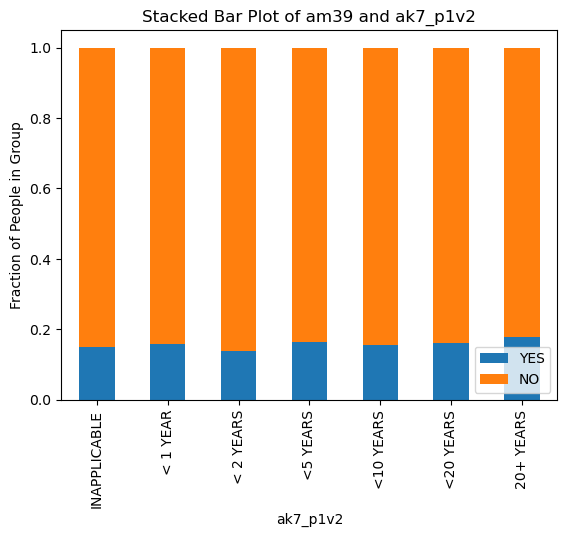

<Figure size 500x300 with 0 Axes>

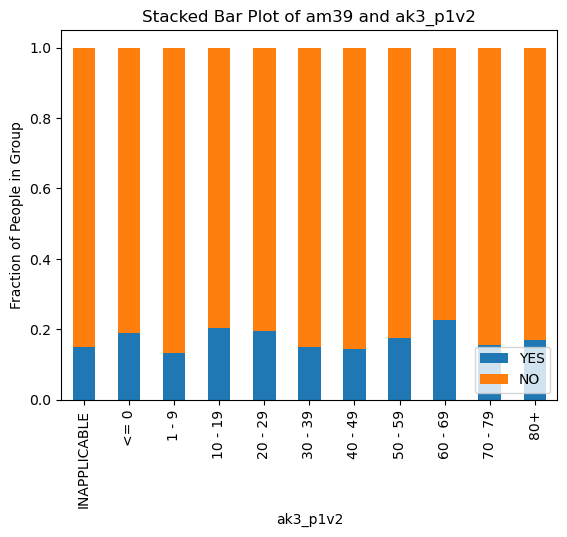

<Figure size 500x300 with 0 Axes>

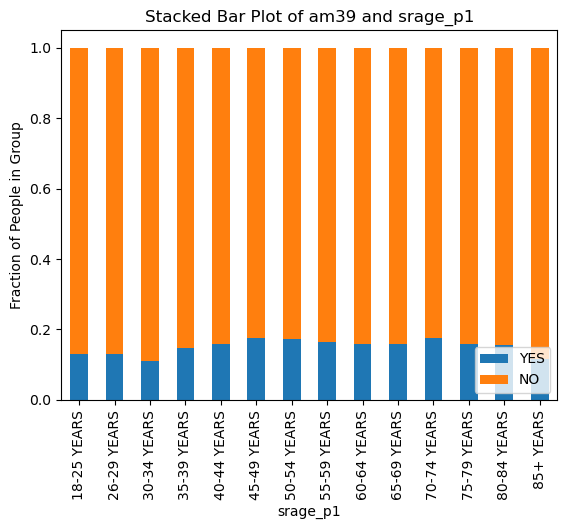

<Figure size 500x300 with 0 Axes>

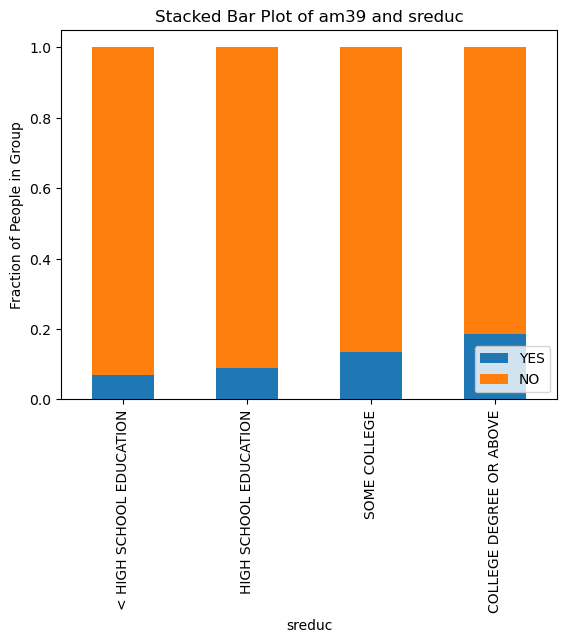

<Figure size 500x300 with 0 Axes>

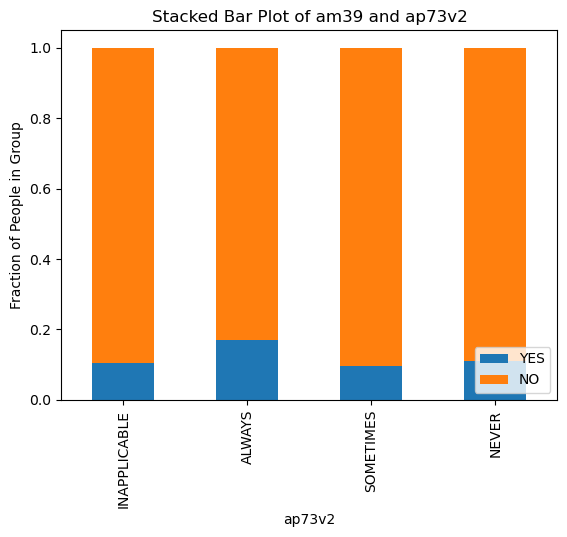

<Figure size 500x300 with 0 Axes>

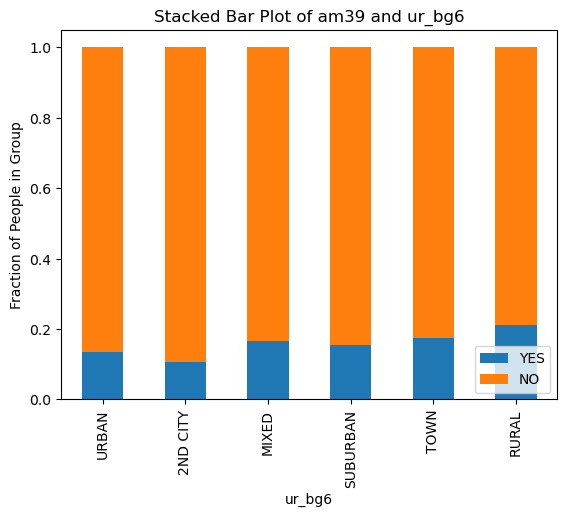

In [22]:
ord_ftrs = ['ak7_p1v2','ak3_p1v2','srage_p1','sreduc','ap73v2','ur_bg6']

for var in ord_ftrs:
    count_matrix = df.groupby([var, y.name]).size().unstack()
    #print(count_matrix)
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    #print(count_matrix_norm)
    plt.figure(figsize=(5,3))
    count_matrix_norm.plot(kind='bar', stacked=True)
    plt.ylabel('Fraction of People in Group')
    plt.title('Stacked Bar Plot of am39 and %s' %var)
    plt.legend(loc=4)
    plt.show()

**Crosstabs of Ordinal Data**

Normalization setting:

- If passed False, will not normalize (value counts).
- If passed 'all' or True, will normalize over all values.
- If passed 'index' will normalize over each row.
- If passed 'columns' will normalize over each column.
- If margins is True, will also normalize margin values.

In [23]:
#from tabulate import tabulate
# Crosstabs of all categorical features

ord_ftrs = ['ak7_p1v2','ak3_p1v2','srage_p1','sreduc','ap73v2','ur_bg6']
norms = [False, 'all', 'index', 'columns']
#norms = [False, 'all', 'index', 'columns', True]

#Loop
for var in ord_ftrs:
    for norm in norms:
        print("Crosstab of", y.name, "and", df[var].name, "with normalization =", norm, "\n")
        print(pd.crosstab(y, df[var], normalize=norm))
        print()
        
#Change Output look
#for var in ord_ftrs:
#    for norm in norms:
#        print("Crosstab of", y.name, "and", df[var].name, "with normalization =", norm, "\n")
#        temp = pd.crosstab(y, df[var], normalize=norm)
#        print(tabulate(temp, headers='keys', tablefmt='psql'))  
#        print()        

Crosstab of am39 and ak7_p1v2 with normalization = False 

ak7_p1v2  INAPPLICABLE  < 1 YEAR  < 2 YEARS  <5 YEARS  <10 YEARS  <20 YEARS  \
am39                                                                          
YES               1328       202        158       439        370        458   
NO                7639      1086        990      2252       2029       2394   

ak7_p1v2  20+ YEARS  
am39                 
YES             463  
NO             2141  

Crosstab of am39 and ak7_p1v2 with normalization = all 

ak7_p1v2  INAPPLICABLE  < 1 YEAR  < 2 YEARS  <5 YEARS  <10 YEARS  <20 YEARS  \
am39                                                                          
YES           0.060504  0.009203   0.007199  0.020001   0.016857   0.020867   
NO            0.348034  0.049478   0.045105  0.102601   0.092442   0.109071   

ak7_p1v2  20+ YEARS  
am39                 
YES        0.021094  
NO         0.097544  

Crosstab of am39 and ak7_p1v2 with normalization = index 

ak7_p1v2  INA

# Selected Figures

<Figure size 500x300 with 0 Axes>

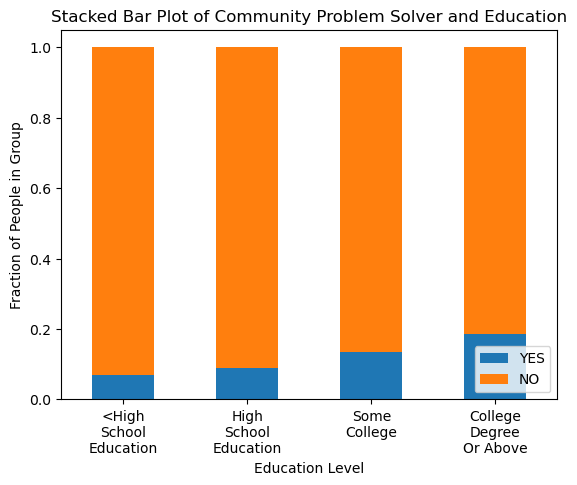

In [24]:
#sreduc

count_matrix = df.groupby(["sreduc", "am39"]).size().unstack()
#print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#print(count_matrix_norm)
plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of People in Group')
plt.xlabel('Education Level')
plt.xticks([0,1,2,3], ["<High\nSchool\nEducation", "High\nSchool\nEducation", "Some\nCollege", "College\nDegree\nOr Above"], rotation=0)
plt.title('Stacked Bar Plot of Community Problem Solver and Education')
plt.legend(loc=4)
plt.show()

<Figure size 500x300 with 0 Axes>

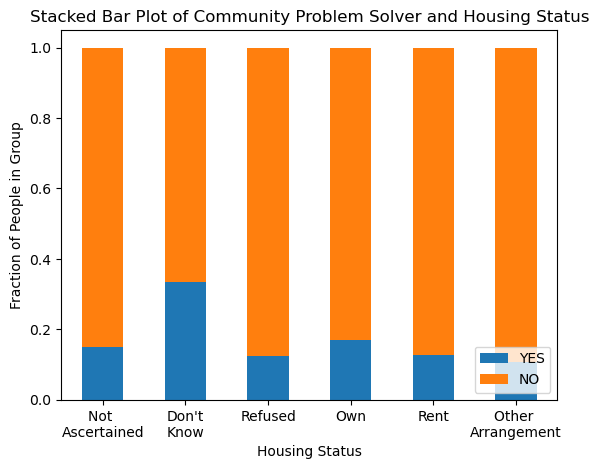

In [25]:
#ak25

count_matrix = df.groupby(["ak25", "am39"]).size().unstack()
#print(count_matrix)
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#print(count_matrix_norm)
plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of People in Group')
plt.xlabel('Housing Status')
plt.xticks([0,1,2,3,4,5], ["Not \nAscertained", "Don't\nKnow", "Refused", "Own", "Rent", "Other \nArrangement"], rotation=0)
plt.title('Stacked Bar Plot of Community Problem Solver and Housing Status')
plt.legend(loc=4)
plt.show()

# Split Data

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

df = data[Demographics_I + Demographics_II + Emp_Inc_Pov_Food + Housing_Civics + Voting + Housing_Insecurity]
df = df[Economics + Demographics + Family_History + Military + Housing + Civics + Politics]

# let's separate the feature matrix X, and target variable y
y = np.where(df['am39'] == "NO", 0, 1)
#y = bank['GenderDummy_F'] = np.where(bank['Gender'] == "Female", 1, 0)
X = df.loc[:, df.columns != 'am39']

ordinal_ftrs = ['ak7_p1v2','ak3_p1v2','srage_p1','sreduc','ap73v2','ur_bg6']
ordinal_cats = [['INAPPLICABLE','< 1 YEAR','< 2 YEARS','<5 YEARS','<10 YEARS','<20 YEARS','20+ YEARS'],\
                ['INAPPLICABLE','<= 0','1 - 9','10 - 19','20 - 29','30 - 39','40 - 49','50 - 59','60 - 69','70 - 79','80+'],\
                ['18-25 YEARS','26-29 YEARS','30-34 YEARS','35-39 YEARS','40-44 YEARS','45-49 YEARS','50-54 YEARS',\
                 '55-59 YEARS','60-64 YEARS','65-69 YEARS','70-74 YEARS','75-79 YEARS','80-84 YEARS','85+ YEARS'],\
                ['< HIGH SCHOOL EDUCATION','HIGH SCHOOL EDUCATION','SOME COLLEGE','COLLEGE DEGREE OR ABOVE'],\
                ['INAPPLICABLE','ALWAYS','SOMETIMES','NEVER'],\
                ['URBAN','2ND CITY','MIXED','SUBURBAN','TOWN','RURAL']]
onehot_ftrs = ['srsex','citizen2','ag22','ak25']
minmax_ftrs = []
std_ftrs = ['famsize2_p1']

# collect all the encoders into one preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

prep = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess, later we will add other steps here

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(df,y,train_size = 0.6,random_state=41)

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=41)

# preprocess the sets
X_train_prep = prep.fit_transform(X_train)
X_val_prep = prep.transform(X_val)
X_test_prep = prep.transform(X_test)

# little hacky, but collect feature names
feature_names = preprocessor.get_feature_names_out()

# Logisitic Regression

**Logisitic Regression with No Penalty**

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

clf = LogisticRegression(penalty = 'none', random_state=0, solver = 'saga', max_iter=10000)
clf.fit(X_train_prep, y_train)
#Calculate the predicated validation scores
y_train_pred = clf.predict(X_train_prep)
y_test_pred = clf.predict(X_test_prep)
y_val_pred = clf.predict(X_val_prep)
#Calculate the Accuracy Scores
print("The accuracy score of the train set is:", accuracy_score(y_train,y_train_pred))
print("The accuracy score of the test set is:", accuracy_score(y_test,y_test_pred))        
print("The accuracy score of the validation set is:", accuracy_score(y_val, y_val_pred))

print("The 0.5 beta score of the validation set is:", fbeta_score(y_val, y_val_pred, beta=0.5))
print("The 1.0 beta score of the validation set is:", fbeta_score(y_val, y_val_pred, beta=1.0))
print("The 1.5 beta score of the validation set is:", fbeta_score(y_val, y_val_pred, beta=1.5))

The accuracy score of the train set is: 0.8461538461538461
The accuracy score of the test set is: 0.838496583143508
The accuracy score of the validation set is: 0.8444191343963553
The 0.5 beta score of the validation set is: 0.0
The 1.0 beta score of the validation set is: 0.0
The 1.5 beta score of the validation set is: 0.0


In [28]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score # the AUC of the P-R curve

precision_recall_curve(y_val,y_val_pred)

#p,r,p_crits = precision_recall_curve(y_val,y_val_pred)
#
#plt.plot(p,r)
#plt.xlabel('precision')
#plt.ylabel('recall')
#plt.title('P-R curve')
#plt.show()

(array([0.15535308, 0.        , 1.        ]),
 array([1., 0., 0.]),
 array([0, 1]))

In [29]:
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings("ignore")
from itertools import chain

result = permutation_importance(clf, X_val_prep, y_val_pred, n_repeats=1, random_state=0)

importance = list(map(float, chain.from_iterable(result.importances)))

#Create Pandas Dataframe
perm_imp = pd.DataFrame(
    {'feature_names': feature_names,
     'importance': importance
    })

perm_imp = perm_imp.sort_values(by='importance', ascending=False)[:10] #Sort and subset to top ten features

perm_imp

feature_names  importance
13         onehot__ak25_DON'T KNOW    0.000228
0                    ord__ak7_p1v2    0.000000
1                    ord__ak3_p1v2    0.000000
18               onehot__ak25_RENT    0.000000
17            onehot__ak25_REFUSED    0.000000
16                onehot__ak25_OWN    0.000000
15  onehot__ak25_OTHER ARRANGEMENT    0.000000
14    onehot__ak25_NOT ASCERTAINED    0.000000
12                onehot__ag22_YES    0.000000
11                 onehot__ag22_NO    0.000000

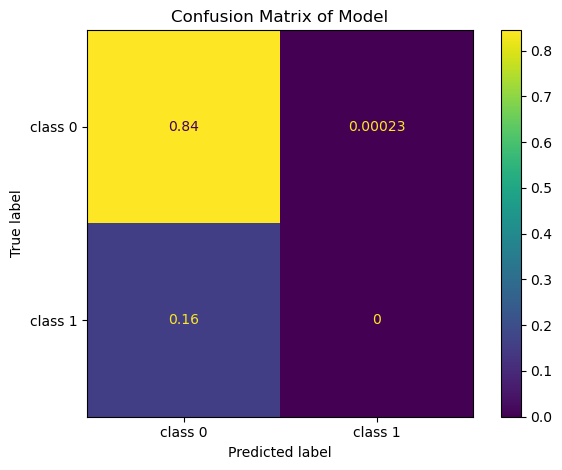

The overall accuracy of the model is: 0.8444191343963553


In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

C = confusion_matrix(y_val, y_val_pred, normalize = 'all')
disp = ConfusionMatrixDisplay(C,display_labels=['class 0', 'class 1'])
disp.plot()
plt.title('Confusion Matrix of Model')  
plt.tight_layout()
plt.show()

print('The overall accuracy of the model is:', (C[0,0] + C[1,1]) / C.sum())

**Logisitic Regression with l1 Penalty**

In [31]:
alpha = np.logspace(-2,2,21) # for l1 and l2 penalty

train_acc = []
test_acc = []
val_acc = []
r_state = []

for a in range(len(alpha)):
    clf = LogisticRegression(penalty = 'l1', C = 1/alpha[a], max_iter=10000, random_state = 0, solver = 'saga')
    clf.fit(X_train_prep, y_train)
    #Calculate the predicated validation scores
    y_train_pred = clf.predict(X_train_prep)
    y_test_pred = clf.predict(X_test_prep)
    y_val_pred = clf.predict(X_val_prep)
    #Calculate Accurcacy Scores
    train_acc.append(accuracy_score(y_train,y_train_pred))
    test_acc.append(accuracy_score(y_test,y_test_pred))
    val_acc.append(accuracy_score(y_val,y_val_pred))

temp = pd.DataFrame({'alpha_penalty': alpha, 'train_acc': train_acc, 'test_acc': test_acc, 'val_acc': val_acc})
temp.loc[temp['val_acc'].idxmax()]

alpha_penalty    0.398107
train_acc        0.846078
test_acc         0.838497
val_acc          0.844647
Name: 8, dtype: float64

In [32]:
result = permutation_importance(clf, X_val_prep, y_val_pred, n_repeats=1, random_state=0)

importance = list(map(float, chain.from_iterable(result.importances)))

#Create Pandas Dataframe
perm_imp = pd.DataFrame(
    {'feature_names': feature_names,
     'importance': importance
    })

perm_imp = perm_imp.sort_values(by='importance', ascending=False)[:10] #Sort and subset to top ten features

perm_imp

feature_names  importance
0                    ord__ak7_p1v2         0.0
1                    ord__ak3_p1v2         0.0
18               onehot__ak25_RENT         0.0
17            onehot__ak25_REFUSED         0.0
16                onehot__ak25_OWN         0.0
15  onehot__ak25_OTHER ARRANGEMENT         0.0
14    onehot__ak25_NOT ASCERTAINED         0.0
13         onehot__ak25_DON'T KNOW         0.0
12                onehot__ag22_YES         0.0
11                 onehot__ag22_NO         0.0

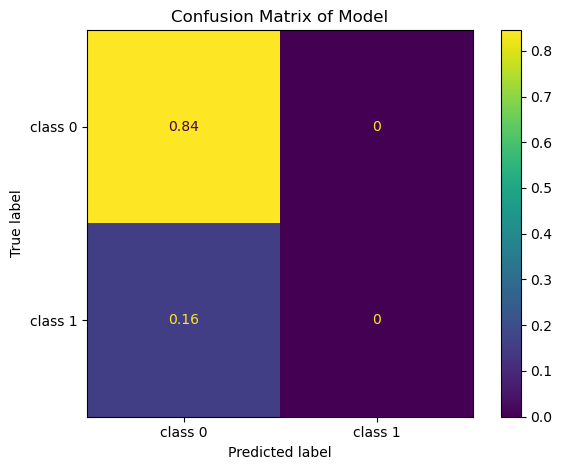

The overall accuracy of the model is: 0.8446469248291572


In [33]:
C = confusion_matrix(y_val, y_val_pred, normalize = 'all')
disp = ConfusionMatrixDisplay(C,display_labels=['class 0', 'class 1'])
disp.plot()
plt.title('Confusion Matrix of Model')  
plt.tight_layout()
plt.show()

print('The overall accuracy of the model is:', (C[0,0] + C[1,1]) / C.sum())

**Logisitic Regression with l2 Penalty**

In [34]:
alpha = np.logspace(-2,2,21) # for l1 and l2 penalty

train_acc = []
test_acc = []
val_acc = []

for a in range(len(alpha)):
    clf = LogisticRegression(penalty = 'l2', C = 1/alpha[a], max_iter=10000, random_state = 0, solver = 'saga')
    clf.fit(X_train_prep, y_train)
    #Calculate the predicated validation scores
    y_train_pred = clf.predict(X_train_prep)
    y_test_pred = clf.predict(X_test_prep)
    y_val_pred = clf.predict(X_val_prep)
    #Calculate Accurcacy Scores
    train_acc.append(accuracy_score(y_train,y_train_pred))
    test_acc.append(accuracy_score(y_test,y_test_pred))
    val_acc.append(accuracy_score(y_val,y_val_pred))

temp = pd.DataFrame({'alpha_penalty': alpha, 'train_acc': train_acc, 'test_acc': test_acc, 'val_acc': val_acc})
temp.loc[temp['val_acc'].idxmax()]

alpha_penalty    0.398107
train_acc        0.846078
test_acc         0.838497
val_acc          0.844647
Name: 8, dtype: float64

In [35]:
result = permutation_importance(clf, X_val_prep, y_val_pred, n_repeats=1, random_state=0)

importance = list(map(float, chain.from_iterable(result.importances)))

#Create Pandas Dataframe
perm_imp = pd.DataFrame(
    {'feature_names': feature_names,
     'importance': importance
    })

perm_imp = perm_imp.sort_values(by='importance', ascending=False)[:10] #Sort and subset to top ten features

perm_imp

feature_names  importance
0                    ord__ak7_p1v2         0.0
1                    ord__ak3_p1v2         0.0
18               onehot__ak25_RENT         0.0
17            onehot__ak25_REFUSED         0.0
16                onehot__ak25_OWN         0.0
15  onehot__ak25_OTHER ARRANGEMENT         0.0
14    onehot__ak25_NOT ASCERTAINED         0.0
13         onehot__ak25_DON'T KNOW         0.0
12                onehot__ag22_YES         0.0
11                 onehot__ag22_NO         0.0

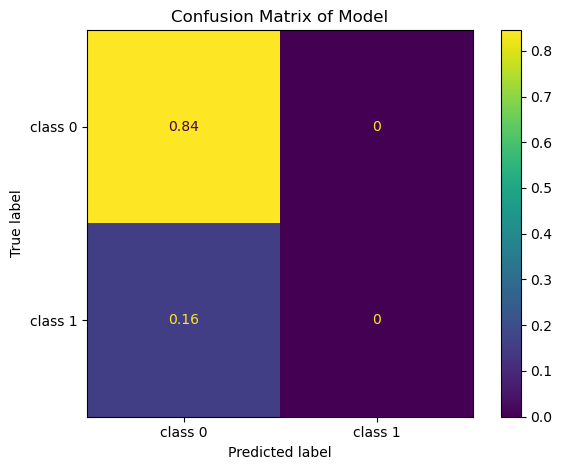

The overall accuracy of the model is: 0.8446469248291572


In [36]:
C = confusion_matrix(y_val, y_val_pred, normalize = 'all')
disp = ConfusionMatrixDisplay(C,display_labels=['class 0', 'class 1'])
disp.plot()
plt.title('Confusion Matrix of Model')  
plt.tight_layout()
plt.show()

print('The overall accuracy of the model is:', (C[0,0] + C[1,1]) / C.sum())

**Logisitic Regression with elastic (l1 and l2) Penalty**

In [37]:
alpha = np.logspace(-2,2,6) # for l1 and l2 penalty
rho = np.linspace(0,1,num = 6) #for elastic net penalty

train_acc = []
test_acc = []
val_acc = []
rho_value = []
alpha_value =[]

for a in range(len(alpha)):
    for r in range(len(rho)):
        #print(a) 
        #print(r)
        #print()
        clf = LogisticRegression(penalty='elasticnet', C = 1/alpha[a], l1_ratio = rho[r], 
                                     max_iter=5000, random_state = 0, solver = 'saga')  
        clf.fit(X_train_prep, y_train)
        #Calculate the predicated validation scores
        y_train_pred = clf.predict(X_train_prep)
        y_test_pred = clf.predict(X_test_prep)
        y_val_pred = clf.predict(X_val_prep)  
        #Calculate Accuracy Scores
        train_acc.append(accuracy_score(y_train,y_train_pred))
        test_acc.append(accuracy_score(y_test,y_test_pred))
        val_acc.append(accuracy_score(y_val,y_val_pred)) 
        #Document Alpha and Rho Scores
        rho_value.append(r)
        alpha_value.append(a)
        
elasticnet_scores = pd.DataFrame({'alpha_penalty': alpha_value,
                                  'rho_penalty': rho_value,
                                  'train_acc': train_acc,
                                  'test_acc': test_acc,
                                  'val_acc': val_acc})
elasticnet_scores.describe()        

alpha_penalty  rho_penalty  train_acc      test_acc    val_acc
count      36.000000    36.000000  36.000000  3.600000e+01  36.000000
mean        2.500000     2.500000   0.846103  8.384966e-01   0.844571
std         1.732051     1.732051   0.000036  2.251943e-16   0.000109
min         0.000000     0.000000   0.846078  8.384966e-01   0.844419
25%         1.000000     1.000000   0.846078  8.384966e-01   0.844419
50%         2.500000     2.500000   0.846078  8.384966e-01   0.844647
75%         4.000000     4.000000   0.846154  8.384966e-01   0.844647
max         5.000000     5.000000   0.846154  8.384966e-01   0.844647

In [38]:
result = permutation_importance(clf, X_val_prep, y_val_pred, n_repeats=1, random_state=0)

importance = list(map(float, chain.from_iterable(result.importances)))

#Create Pandas Dataframe
perm_imp = pd.DataFrame(
    {'feature_names': feature_names,
     'importance': importance
    })

perm_imp = perm_imp.sort_values(by='importance', ascending=False)[:10] #Sort and subset to top ten features

perm_imp

feature_names  importance
0                    ord__ak7_p1v2         0.0
1                    ord__ak3_p1v2         0.0
18               onehot__ak25_RENT         0.0
17            onehot__ak25_REFUSED         0.0
16                onehot__ak25_OWN         0.0
15  onehot__ak25_OTHER ARRANGEMENT         0.0
14    onehot__ak25_NOT ASCERTAINED         0.0
13         onehot__ak25_DON'T KNOW         0.0
12                onehot__ag22_YES         0.0
11                 onehot__ag22_NO         0.0

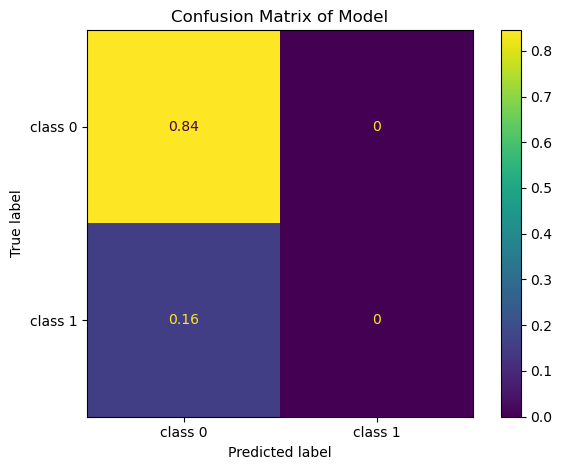

The overall accuracy of the model is: 0.8446469248291572


In [39]:
C = confusion_matrix(y_val, y_val_pred, normalize = 'all')
disp = ConfusionMatrixDisplay(C,display_labels=['class 0', 'class 1'])
disp.plot()
plt.title('Confusion Matrix of Model')  
plt.tight_layout()
plt.show()

print('The overall accuracy of the model is:', (C[0,0] + C[1,1]) / C.sum())

# Random Forest Classification

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# let's train a random forest classifier

# we will loop through nr_states random states so we will return nr_states test scores and nr_states trained models
nr_states = 5
test_scores = np.zeros(nr_states)
val_scores = np.zeros(nr_states)
final_models = []

# loop through the different random states
for i in range(nr_states):
    print('randoms state '+str(i+1))

    # decide which parameters to tune and what values to try
    # the default value of any parameter not specified here will be used
    param_grid = {
                  'max_depth': [1, 3, 10, 30, 100], # no upper bound so the values are evenly spaced in log
                  'max_features': [0.25, 0.5,0.75,1.0] # linearly spaced because it is between 0 and 1, 0 is omitted
                  } 

    # we save the train and validation scores
    # the validation scores are necessary to select the best model
    # it's optional to save the train scores, it can be used to identify high bias and high variance models
    train_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score = np.zeros(len(ParameterGrid(param_grid)))
    models = []
    
    # loop through all combinations of hyperparameter combos
    for p in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[p]
        print('   ',params) 
        clf = RandomForestClassifier(**params,random_state = 42*i,n_jobs=-1) # initialize the classifier
        clf.fit(X_train_prep,y_train) # fit the model
        models.append(clf) # save it
        # calculate train and validation accuracy scores
        y_train_pred = clf.predict(X_train_prep)
        train_score[p] = accuracy_score(y_train,y_train_pred)
        y_val_pred = clf.predict(X_val_prep)
        val_score[p] = accuracy_score(y_val,y_val_pred)
        print('   ',train_score[p],val_score[p])
    
    # print out model parameters that maximize validation accuracy
    print('best model parameters:',ParameterGrid(param_grid)[np.argmax(val_score)])
    print('corresponding validation score:',np.max(val_score))
    # collect and save the best model
    final_models.append(models[np.argmax(val_score)])
    # calculate and save the test score
    y_test_pred = final_models[-1].predict(X_test_prep)
    test_scores[i] = accuracy_score(y_test,y_test_pred)
    y_val_pred = final_models[-1].predict(X_val_prep)
    val_scores[i] = accuracy_score(y_val,y_val_pred)        
    print('test score:',test_scores[i])
    print('val score:',val_scores[i])    
  

randoms state 1
    {'max_features': 0.25, 'max_depth': 1}
    0.8460779102437542 0.8446469248291572
    {'max_features': 0.5, 'max_depth': 1}
    0.8460779102437542 0.8446469248291572
    {'max_features': 0.75, 'max_depth': 1}
    0.8460779102437542 0.8446469248291572
    {'max_features': 1.0, 'max_depth': 1}
    0.8460779102437542 0.8446469248291572
    {'max_features': 0.25, 'max_depth': 3}
    0.8460779102437542 0.8446469248291572
    {'max_features': 0.5, 'max_depth': 3}
    0.8460779102437542 0.8446469248291572
    {'max_features': 0.75, 'max_depth': 3}
    0.8460779102437542 0.8446469248291572
    {'max_features': 1.0, 'max_depth': 3}
    0.8460779102437542 0.8446469248291572
    {'max_features': 0.25, 'max_depth': 10}
    0.8480522439061432 0.8451025056947609
    {'max_features': 0.5, 'max_depth': 10}
    0.8523805907813805 0.8451025056947609
    {'max_features': 0.75, 'max_depth': 10}
    0.8538233730731263 0.8446469248291572
    {'max_features': 1.0, 'max_depth': 10}
    0.85

    0.8460779102437542 0.8446469248291572
    {'max_features': 0.25, 'max_depth': 10}
    0.848204115726327 0.8446469248291572
    {'max_features': 0.5, 'max_depth': 10}
    0.8514693598602779 0.8451025056947609
    {'max_features': 0.75, 'max_depth': 10}
    0.853367757612575 0.8455580865603645
    {'max_features': 1.0, 'max_depth': 10}
    0.85397524489331 0.844874715261959
    {'max_features': 0.25, 'max_depth': 30}
    0.9462373756549473 0.8259681093394078
    {'max_features': 0.5, 'max_depth': 30}
    0.9462373756549473 0.8250569476082005
    {'max_features': 0.75, 'max_depth': 30}
    0.9462373756549473 0.8202733485193622
    {'max_features': 1.0, 'max_depth': 30}
    0.9462373756549473 0.8186788154897494
    {'max_features': 0.25, 'max_depth': 100}
    0.9462373756549473 0.826879271070615
    {'max_features': 0.5, 'max_depth': 100}
    0.9462373756549473 0.8236902050113896
    {'max_features': 0.75, 'max_depth': 100}
    0.9462373756549473 0.8209567198177676
    {'max_features':

In [41]:
result = permutation_importance(clf, X_val_prep, y_val_pred, n_repeats=1, random_state=0)

importance = list(map(float, chain.from_iterable(result.importances)))

#Create Pandas Dataframe
perm_imp = pd.DataFrame(
    {'feature_names': feature_names,
     'importance': importance
    })

perm_imp = perm_imp.sort_values(by='importance', ascending=False)[:10] #Sort and subset to top ten features

perm_imp

feature_names  importance
19              std__famsize2_p1    0.010023
1                  ord__ak3_p1v2    0.009112
0                  ord__ak7_p1v2    0.008200
2                  ord__srage_p1    0.007062
5                    ord__ur_bg6    0.002050
4                    ord__ap73v2    0.001822
9   onehot__citizen2_NON-CITIZEN    0.001595
3                    ord__sreduc    0.000911
14  onehot__ak25_NOT ASCERTAINED    0.000228
13       onehot__ak25_DON'T KNOW    0.000000

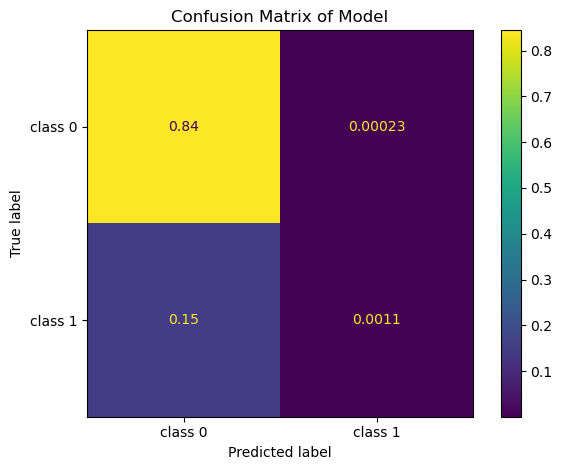

The overall accuracy of the model is: 0.8455580865603645


In [42]:
C = confusion_matrix(y_val, y_val_pred, normalize = 'all')
disp = ConfusionMatrixDisplay(C,display_labels=['class 0', 'class 1'])
disp.plot()
plt.title('Confusion Matrix of Model')  
plt.tight_layout()
plt.show()

print('The overall accuracy of the model is:', (C[0,0] + C[1,1]) / C.sum())

In [43]:
import shap
shap.initjs() # required for visualizations later on

# Shapley Values for Feature Importance

# Fit relevant explainer
explainer = shap.TreeExplainer(clf, enable_categorical="True")
shap_values = explainer.shap_values(X_val_prep)
# View shap values
print(shap_values)

[array([[ 3.27112730e-02,  1.25369247e-02,  1.28997870e-02, ...,
         7.82430121e-05,  3.21708895e-03,  4.23107305e-02],
       [ 1.14250328e-02,  4.81924329e-02,  2.78175679e-02, ...,
         2.48248736e-05,  4.37860827e-04, -2.03921109e-02],
       [ 1.46141690e-02,  1.37457226e-02,  1.23197572e-02, ...,
         2.64399643e-05,  2.30951538e-03,  1.55058057e-02],
       ...,
       [-2.28257992e-02,  1.01891093e-02, -1.07973819e-02, ...,
         2.74448437e-05, -2.08557025e-02,  2.02249276e-02],
       [-2.05447827e-04,  1.56583818e-03, -1.94337105e-02, ...,
         2.32967944e-05, -6.17794963e-04, -6.61881839e-02],
       [ 7.59082332e-03, -1.57587052e-02, -7.84380713e-03, ...,
         3.79086402e-05,  4.74149107e-03, -1.49735636e-02]]), array([[-3.27112730e-02, -1.25369247e-02, -1.28997870e-02, ...,
        -7.82430121e-05, -3.21708895e-03, -4.23107305e-02],
       [-1.14250328e-02, -4.81924329e-02, -2.78175679e-02, ...,
        -2.48248736e-05, -4.37860827e-04,  2.03921109

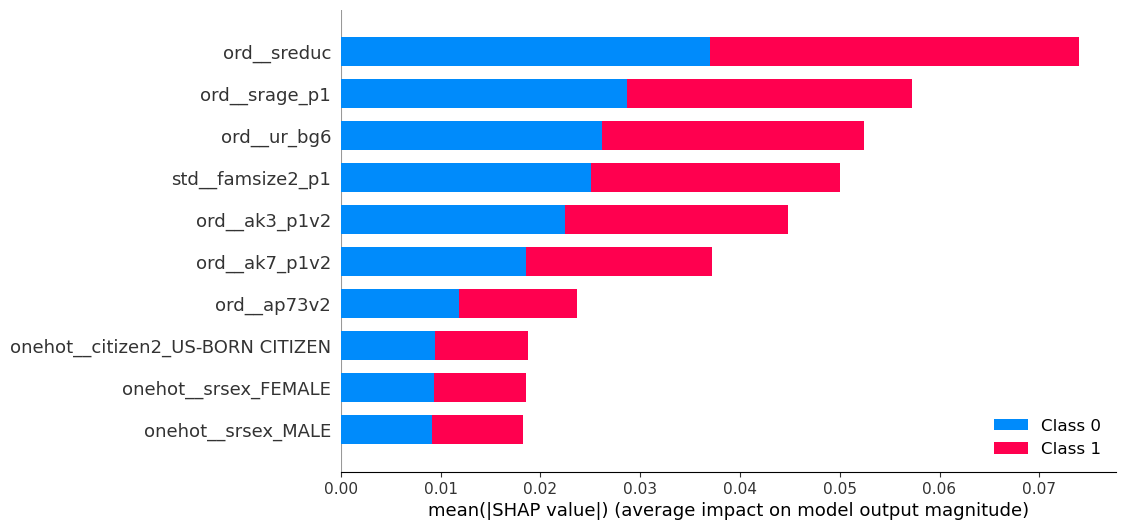

In [44]:
# Plot the values

plt_shap = shap.summary_plot(shap_values, #Use Shap values array
                             features=X_val_prep, # Use training set features
                             feature_names=feature_names, #Use column names
                             #show=False, #Set to false to output to folder
                             plot_size=(10,6),
                             max_display = 10) # Change plot size

# Save my figure to a directory
#plt.savefig("plots/global_shap.png")

In [45]:
temp_shap =[l.tolist() for l in shap_values]
new_shap = [x[0] for x in temp_shap]

In [46]:
#new_shap

In [47]:
#Set Random State so results are reproduceable
random_state=10

print("Expected Value:", explainer.expected_value)
shap.force_plot(explainer.expected_value[1], 
                shap_values[1], 
                feature_names = feature_names, 
                #matplotlib=True,
                figsize=(30,8)
               )

Expected Value: [0.84626699 0.15373301]


# Nearest Neighbor Classification

**Use `Uniform` (Default) Weights**

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
matplotlib.rcParams.update({'font.size': 14})

train_acc = []
test_acc = []
val_acc = []

# Predictions for n_neighbors = 1, 10, 30, and 100
n_neighbors = [1, 10, 30, 100]

#
for i in n_neighbors: 
    # Use KNeighborsClassifies
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train_prep, y_train)
    #Calculate the predicated validation scores
    y_train_pred = clf.predict(X_train_prep)
    y_test_pred = clf.predict(X_test_prep)
    y_val_pred = clf.predict(X_val_prep)  
    #Calculate Accuracy Scores
    train_acc.append(accuracy_score(y_train,y_train_pred))
    test_acc.append(accuracy_score(y_test,y_test_pred))
    val_acc.append(accuracy_score(y_val,y_val_pred)) 
    
nn_scores = pd.DataFrame({'n_neighbors': n_neighbors, 'train_acc': train_acc, 'test_acc': test_acc, 'val_acc': val_acc})
nn_scores  

n_neighbors  train_acc  test_acc   val_acc
0            1   0.922393  0.744419  0.753303
1           10   0.846989  0.835763  0.843508
2           30   0.846002  0.838497  0.844647
3          100   0.846078  0.838497  0.844647

In [49]:
result = permutation_importance(clf, X_val_prep, y_val_pred, n_repeats=1, random_state=0)

importance = list(map(float, chain.from_iterable(result.importances)))

#Create Pandas Dataframe
perm_imp = pd.DataFrame(
    {'feature_names': feature_names,
     'importance': importance
    })

perm_imp = perm_imp.sort_values(by='importance', ascending=False)[:10] #Sort and subset to top ten features

perm_imp

feature_names  importance
0                    ord__ak7_p1v2         0.0
1                    ord__ak3_p1v2         0.0
18               onehot__ak25_RENT         0.0
17            onehot__ak25_REFUSED         0.0
16                onehot__ak25_OWN         0.0
15  onehot__ak25_OTHER ARRANGEMENT         0.0
14    onehot__ak25_NOT ASCERTAINED         0.0
13         onehot__ak25_DON'T KNOW         0.0
12                onehot__ag22_YES         0.0
11                 onehot__ag22_NO         0.0

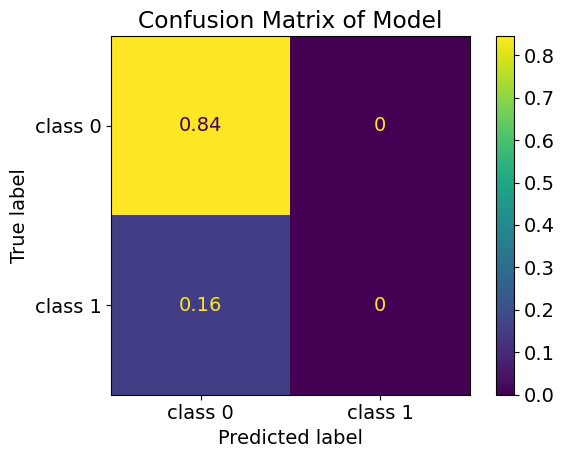

The overall accuracy of the model is: 0.8446469248291572


In [50]:
C = confusion_matrix(y_val, y_val_pred, normalize = 'all')
disp = ConfusionMatrixDisplay(C,display_labels=['class 0', 'class 1'])
disp.plot()
plt.title('Confusion Matrix of Model')  
plt.tight_layout()
plt.show()

print('The overall accuracy of the model is:', (C[0,0] + C[1,1]) / C.sum())

**Use `Distance` Weight**

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
matplotlib.rcParams.update({'font.size': 14})

train_acc = []
test_acc = []
val_acc = []

# Predictions for n_neighbors = 1, 10, 30, and 100
n_neighbors = [1, 10, 30, 100]

#
for i in n_neighbors: 
    # Use KNeighborsClassifies
    clf = KNeighborsClassifier(n_neighbors=i, weights='distance')
    clf.fit(X_train_prep, y_train)
    #Calculate the predicated validation scores
    y_train_pred = clf.predict(X_train_prep)
    y_test_pred = clf.predict(X_test_prep)
    y_val_pred = clf.predict(X_val_prep)  
    #Calculate Accuracy Scores
    train_acc.append(accuracy_score(y_train,y_train_pred))
    test_acc.append(accuracy_score(y_test,y_test_pred))
    val_acc.append(accuracy_score(y_val,y_val_pred)) 
    
nn_scores = pd.DataFrame({'n_neighbors': n_neighbors, 'train_acc': train_acc, 'test_acc': test_acc, 'val_acc': val_acc})
nn_scores  

n_neighbors  train_acc  test_acc   val_acc
0            1   0.922393  0.744419  0.753303
1           10   0.946161  0.823007  0.832802
2           30   0.946237  0.826651  0.834852
3          100   0.946237  0.826651  0.834852

In [52]:
result = permutation_importance(clf, X_val_prep, y_val_pred, n_repeats=1, random_state=0)

importance = list(map(float, chain.from_iterable(result.importances)))

#Create Pandas Dataframe
perm_imp = pd.DataFrame(
    {'feature_names': feature_names,
     'importance': importance
    })

perm_imp = perm_imp.sort_values(by='importance', ascending=False)[:10] #Sort and subset to top ten features

perm_imp

feature_names  importance
2                      ord__srage_p1    0.030068
5                        ord__ur_bg6    0.028246
19                  std__famsize2_p1    0.026424
0                      ord__ak7_p1v2    0.016629
1                      ord__ak3_p1v2    0.015034
3                        ord__sreduc    0.013667
4                        ord__ap73v2    0.008200
6               onehot__srsex_FEMALE    0.008200
7                 onehot__srsex_MALE    0.008200
10  onehot__citizen2_US-BORN CITIZEN    0.005923

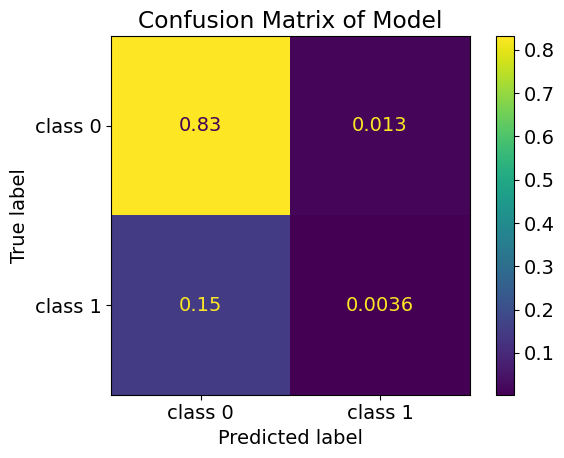

The overall accuracy of the model is: 0.8348519362186789


In [53]:
C = confusion_matrix(y_val, y_val_pred, normalize = 'all')
disp = ConfusionMatrixDisplay(C,display_labels=['class 0', 'class 1'])
disp.plot()
plt.title('Confusion Matrix of Model')  
plt.tight_layout()
plt.show()

print('The overall accuracy of the model is:', (C[0,0] + C[1,1]) / C.sum())

# SVM Classification

In [54]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.svm import SVC

train_acc = []
test_acc = []
val_acc = []
gamma_value = []
C_value = []

gamma = [1e-3, 1e-1, 1e0, 1e1, 1e3]
Cs = [1e-3, 1e-1, 1e0, 1e1, 1e3]

# set the hyperparameters
for g in gamma:
    for c in Cs:
        clf = SVC(gamma = g, C = c, probability=True)
        clf.fit(X_train_prep, y_train)
        #Calculate the predicated validation scores
        y_train_pred = clf.predict(X_train_prep)
        y_test_pred = clf.predict(X_test_prep)
        y_val_pred = clf.predict(X_val_prep)  
        #Calculate Accuracy Scores
        train_acc.append(accuracy_score(y_train,y_train_pred))
        test_acc.append(accuracy_score(y_test,y_test_pred))
        val_acc.append(accuracy_score(y_val,y_val_pred)) 
        gamma_value.append(g)
        C_value.append(c)

svm_scores = pd.DataFrame({'gamma_value': gamma_value, 'C_value': C_value, 'train_acc': train_acc, 
                           'test_acc': test_acc, 'val_acc': val_acc})
svm_scores 

gamma_value   C_value  train_acc  test_acc   val_acc
0         0.001     0.001   0.846078  0.838497  0.844647
1         0.001     0.100   0.846078  0.838497  0.844647
2         0.001     1.000   0.846078  0.838497  0.844647
3         0.001    10.000   0.846078  0.838497  0.844647
4         0.001  1000.000   0.846078  0.838497  0.844647
5         0.100     0.001   0.846078  0.838497  0.844647
6         0.100     0.100   0.846078  0.838497  0.844647
7         0.100     1.000   0.846154  0.838497  0.844647
8         0.100    10.000   0.867568  0.830979  0.835308
9         0.100  1000.000   0.932569  0.764009  0.768337
10        1.000     0.001   0.846078  0.838497  0.844647
11        1.000     0.100   0.846078  0.838497  0.844647
12        1.000     1.000   0.909105  0.835308  0.842597
13        1.000    10.000   0.946237  0.813667  0.820046
14        1.000  1000.000   0.946237  0.813667  0.820046
15       10.000     0.001   0.846078  0.838497  0.844647
16       10.000     0.100   0.846078  0.838497  0.844647
17       10.000     1.000   0.946237  0.826651  0.834852
18       10.000    10.000   0.946237  0.826651  0.834852
19       10.000  1000.000   0.946237  0.826651  0.834852
20     1000.000     0.001   0.846078  0.838497  0.844647
21     1000.000     0.100   0.846078  0.838497  0.844647
22     1000.000     1.000   0.946237  0.826651  0.834852
23     1000.000    10.000   0.946237  0.826651  0.834852
24     1000.000  1000.000   0.946237  0.826651  0.834852

In [55]:

clf = SVC(gamma = 0.001	, C = 0.001	, probability=True)
clf.fit(X_train_prep, y_train)
#Calculate the predicated validation scores
y_train_pred = clf.predict(X_train_prep)
y_test_pred = clf.predict(X_test_prep)
y_val_pred = clf.predict(X_val_prep)  
#Calculate Accuracy Scores
print("accuracy score:", accuracy_score(y_train,y_train_pred))
print("accuracy score:", accuracy_score(y_test,y_test_pred))
print("accuracy score:", accuracy_score(y_val,y_val_pred)) 



accuracy score: 0.8460779102437542
accuracy score: 0.838496583143508
accuracy score: 0.8446469248291572


In [56]:
result = permutation_importance(clf, X_val_prep, y_val_pred, n_repeats=1, random_state=0)

importance = list(map(float, chain.from_iterable(result.importances)))

#Create Pandas Dataframe
perm_imp = pd.DataFrame(
    {'feature_names': feature_names,
     'importance': importance
    })

perm_imp = perm_imp.sort_values(by='importance', ascending=False)[:10] #Sort and subset to top ten features

perm_imp

feature_names  importance
0                    ord__ak7_p1v2         0.0
1                    ord__ak3_p1v2         0.0
18               onehot__ak25_RENT         0.0
17            onehot__ak25_REFUSED         0.0
16                onehot__ak25_OWN         0.0
15  onehot__ak25_OTHER ARRANGEMENT         0.0
14    onehot__ak25_NOT ASCERTAINED         0.0
13         onehot__ak25_DON'T KNOW         0.0
12                onehot__ag22_YES         0.0
11                 onehot__ag22_NO         0.0

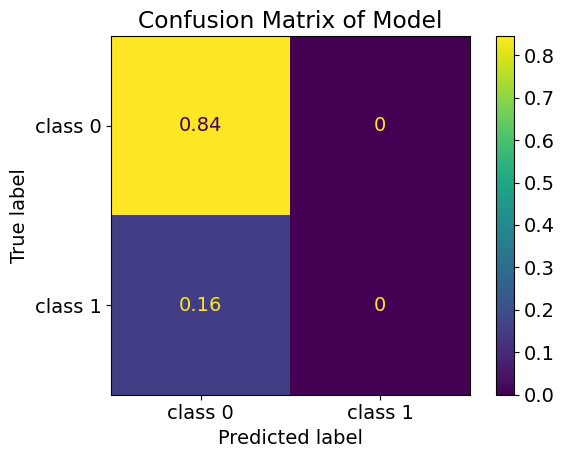

The overall accuracy of the model is: 0.8446469248291572


In [57]:
C = confusion_matrix(y_val, y_val_pred, normalize = 'all')
disp = ConfusionMatrixDisplay(C,display_labels=['class 0', 'class 1'])
disp.plot()
plt.title('Confusion Matrix of Model')  
plt.tight_layout()
plt.show()

print('The overall accuracy of the model is:', (C[0,0] + C[1,1]) / C.sum())